In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import PyQt5
import math
import scipy.integrate
import numpy as np
%matplotlib notebook
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:


file_csv='/Users/pecce.victor/Desktop/prepa TIPE velo piezo/data_1667399308.csv'

# lire le fichier .csv dans la frame base
base=pd.read_csv(file_csv, sep=',', skipinitialspace=True, encoding="utf-8")  

#Changer les types des cellules en float
for field in base.columns:
    base[field] = base[field].astype(float)



print(base[0:100])

# passage des unités binaires processeurs aux unités physiques 
for i in base.index:
    base['Delta T (ms)'][i]= base['Delta T (ms)'][i]/1000000.0
    base['Time (s)'][i]= base['Time (s)'][i]/1000000.0
    base['Accel X (m/s^2)'][i]= (base['Accel X (m/s^2)'][i]-13130.0)*0.0202199
    base['Accel Y (m/s^2)'][i]= (base['Accel Y (m/s^2)'][i]-13130.0)*0.0202199
    base['Accel Z (m/s^2)'][i]= (base['Accel Z (m/s^2)'][i]-13130.0)*0.0202199
    base['Volt (V)'][i]= base['Volt (V)'][i]*0.000125
    
print(base[0:9])

# Les valeurs "temps accélération" utilisées dans la simulation 

az=base['Accel Z (m/s^2)']
taz=base['Time (s)']/1000











       Time (s)  Delta T (ms)  Accel X (m/s^2)  Accel Y (m/s^2)  \
0     2965269.0     2965269.0          13080.0          13480.0   
1     4628549.0     1663280.0          13078.0          13481.0   
2     6331776.0     1703227.0          13080.0          13471.0   
3     7920908.0     1589132.0          13080.0          13482.0   
4     9508687.0     1587779.0          13090.0          13484.0   
5    11096263.0     1587576.0          13078.0          13478.0   
6    12684728.0     1588465.0          13081.0          13477.0   
7    14269451.0     1584723.0          13082.0          13472.0   
8    15897862.0     1628411.0          13084.0          13483.0   
9    17483419.0     1585557.0          13084.0          13480.0   
10   19069438.0     1586019.0          13081.0          13476.0   
11   20650677.0     1581239.0          13080.0          13481.0   
12   22233769.0     1583092.0          13086.0          13482.0   
13   23814509.0     1580740.0          13083.0          13476.

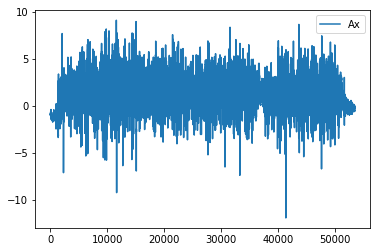

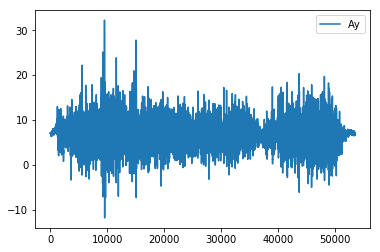

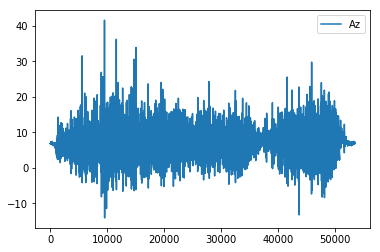

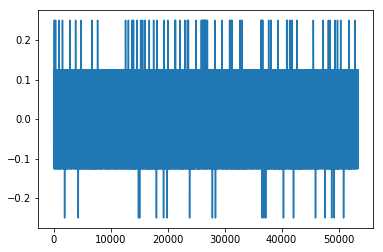

In [3]:
plt.figure(1)
plt.plot(base['Time (s)'], base['Accel X (m/s^2)'])
plt.legend(['Ax'])
plt.figure(2)
plt.plot(base['Time (s)'], base['Accel Y (m/s^2)'])
plt.legend(['Ay'])
plt.figure(3)
plt.plot(base['Time (s)'], base['Accel Z (m/s^2)'])
plt.legend(['Az'])

#plt.figure(3)
#plt.plot(base['Time (s)'], base['Accel X (m/s^2)'])
#plt.plot(base['Time (s)'], base['Accel Y (m/s^2)'])
#plt.plot(base['Time (s)'], base['Accel Z (m/s^2)'])
#plt.legend(['Ax', 'Ay', 'Az'])




plt.figure(4)
#plt.plot(base['Time (s)'], base['Accel X (m/s^2)'])
#plt.plot(base['Time (s)'], base['Accel Y (m/s^2)'])
#plt.plot(base['Time (s)'], base['Accel Z (m/s^2)'])
plt.plot(base['Time (s)'], base['Volt (V)']*1000)



In [4]:
#paramètres du résonateur
m=5e-3
k=100
Q=10
mu=math.sqrt(m*k)/Q

# La force exerne en fonction du temps
# retourne la valeur de l'accélératin multiplié par la masse 
# A partir des données expérimentales, en utilisant la fonction interpolation 
def Fext(t):
#    if t>0:
#        return 1
#    else :
#        return 0
#
  return np.interp(t, taz, -m*az)


def func(t,gamma):
    return [gamma[1], 1/m*(Fext(t)-mu*gamma[1]-k*gamma[0])]


#Création d'un objet "intégrateur d'équation différentielle dot gamma = func (gamma)"
r = scipy.integrate.ode(func)
# on définit les conditions initiales 
r.set_initial_value([0,0], 0)

# On integre : la solution entre 0 et t1, avec un pas d'intégration de 0.0001 s 
t1 = 10
dt = 0.0001
# on créé les tablaeux vides pour les solutions 
x=[]
v=[]
t=[]
# On intègre l'équation pas par pas
while r.successful() and r.t < t1:
    gamma=r.integrate(r.t+dt)
    tx=np.append(t,r.t+dt)
    x=np.append(x,gamma[0])
    v=np.append(v,gamma[1])


#Rajouter par moi



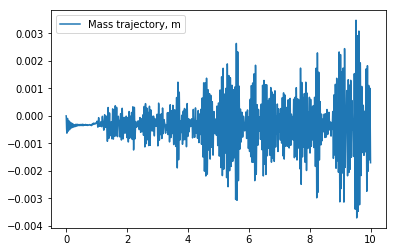

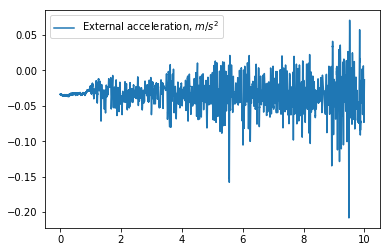

In [5]:
plt.figure()
plt.plot(t,x)
plt.legend(['Mass trajectory, m'])
plt.figure()
plt.plot(t, Fext(t))
plt.legend(['External acceleration, $m/s^2$'])

In [57]:
C*R

0.1

In [86]:

def dV(V,C,R,i):
    return(( i - V/R)*(1/C))

def euler_explicite(dV, a, b, V0, p):
    V = V0
    tlist = [a]
    Vlist = [V0]
    for j in range(round((b-a)/p)):
        dVdt = dV(V, C, R, alpha*np.interp(j*p+a, tx, v))
#        dVdt = dV(V, C, R, 1)
        V = V + dVdt*p
        Vlist.append(V)
        tlist.append(p*j +a)
    return tlist, Vlist

alpha = 0.4e-4
V0=0
C=10e-9
R=10e6

a=8
b=10
p=0.001
tel, V = euler_explicite(dV, a, b, 0, p)

Wr_ab=0
for val in V:
    Wr_ab=Wr_ab+val**2/R*p

Pr_ab=Wr_ab/(b-a)
print('Energie recoltée : {:1.2e} J, Puissance moyenne entre a et b : {:1.2e}'.format(Wr_ab, Pr_ab))

Energie recoltée : 4.70e-06 J, Puissance moyenne entre a et b : 2.35e-06


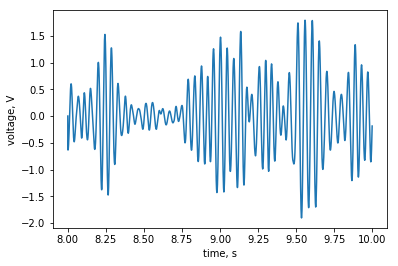

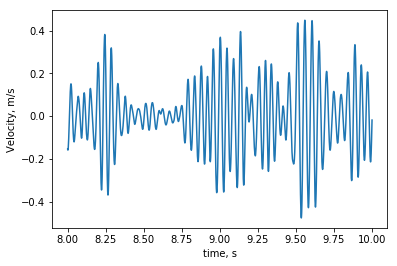

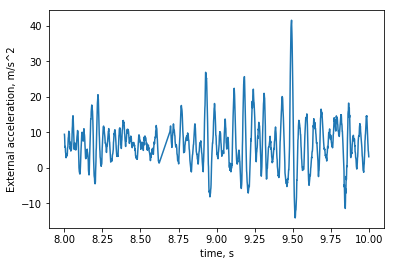

In [76]:

plt.xlabel("time, s")
plt.ylabel("voltage, V")
plt.plot(tel,V)
plt.show()


# Selection de sous intervale [a,b] dans le vecteur tx
tmp=abs(tx-a)
i1=np.where(tmp==min(tmp))[0][0]
tmp=abs(t-b)
i2=np.where(tmp==min(tmp))[0][0]


plt.xlabel("time, s")
plt.ylabel("Velocity, m/s")
plt.plot(tx[i1:i2],v[i1:i2])
plt.show()

# Selection de sous intervale [a,b] dans le vecteur taz
tmp=abs(taz-a)
i1=np.where(tmp==min(tmp))[0][0]
tmp=abs(taz-b)
i2=np.where(tmp==min(tmp))[0][0]

plt.xlabel("time, s")
plt.ylabel("External acceleration, m/s^2")
plt.plot(taz[i1:i2],az[i1:i2])
plt.show()








(array([19998]),)